<a href="https://colab.research.google.com/github/VitorFRodrigues/Alura_Challenges/blob/main/notebook/Alura_Challenge_DataScience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dados_URL = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'

In [2]:
import pandas as pd
dados = pd.read_json(dados_URL)

In [3]:
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


As últimas colunas estão compiladas com dicionários:

Vamos expandir as colunas com o auxilio da função *json_normalize*. Vamos criar uma função para automatizar

In [4]:
def normalizar(dados, colunas):
  for i in range(0, len(colunas)):
    normaliza = pd.json_normalize(dados[colunas[i]])
    dados = pd.concat([dados, normaliza], axis='columns').drop(columns=colunas[i])
  return dados

In [5]:
colunas = ['customer', 'phone', 'internet', 'account']
dados = normalizar(dados, colunas)

In [6]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#1.0 Analise e tratamento dos dados

##1.1 CustomerID

Checagem se cada ID é único

In [7]:
len(dados['customerID'].unique())

7267

Valores únicos de customerID é igual ao número de linhas dos dados o que comprova que cada linha possui ID único.

##1.2 Churn

Checagem se opção de escolha se limita a Yes / No

In [8]:
dados['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

Vemos que algumas linhas não possuem tag, vamos identificar quantas linhas:

In [9]:
len(dados.query('Churn!="Yes" & Churn!="No"'))

224

In [10]:
len(dados.query('Churn!="Yes" & Churn!="No"'))/len(dados)*100

3.0824274115866244

São 224 linhas sem Tag o que corresponde a cerca de 3% de todo conjunto de dados. Estas serão armazenada em variável específica e removida do conjunto de dados

In [11]:
dados_sem_tag = dados.query('Churn!="Yes" & Churn!="No"')
dados_sem_tag

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [12]:
dados_limpos = dados.query('Churn=="Yes" or Churn=="No"')
dados_limpos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
dados_limpos['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Vamos identificar as variações nas demais colunas

In [14]:
for columns in dados_limpos:
  print(f'Coluna {columns}: {dados_limpos[columns].unique()}')

Coluna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna Churn: ['No' 'Yes']
Coluna gender: ['Female' 'Male']
Coluna SeniorCitizen: [0 1]
Coluna Partner: ['Yes' 'No']
Coluna Dependents: ['Yes' 'No']
Coluna tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Coluna PhoneService: ['Yes' 'No']
Coluna MultipleLines: ['No' 'Yes' 'No phone service']
Coluna InternetService: ['DSL' 'Fiber optic' 'No']
Coluna OnlineSecurity: ['No' 'Yes' 'No internet service']
Coluna OnlineBackup: ['Yes' 'No' 'No internet service']
Coluna DeviceProtection: ['No' 'Yes' 'No internet service']
Coluna TechSupport: ['Yes' 'No' 'No internet service']
Coluna StreamingTV: ['Yes' 'No' 'No internet service']
Coluna StreamingMovies: ['No' 'Yes' 'No internet service']
Coluna Contract: ['One yea

Muitas das features podem ser facilmente categorizadas já que possuem até no máximo 5 categorias. A feature 'Charges.Total' veio do banco de dados traduzida para texto. Sendo assim, vamos alterá-la para facilitar seu entendimento e manipulação.

In [15]:
dados_limpos['Charges.Total'] = pd.to_numeric(dados_limpos['Charges.Total'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
dados_limpos['Charges.Total'].dtypes

dtype('float64')

Vamos identificar se o conjunto de dados possui itens do tipo NaN (Not-a-Number)

In [17]:
dados_limpos[dados_limpos.isna().any(axis=1)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Como 11 linhas representa apenas 0,15% dentro das 7.043 linhas, vamos remove-las do dataframe 

In [18]:
dados_NaN = dados_limpos[dados_limpos.isna().any(axis=1)]
dados_limpos = dados_limpos.drop(dados_limpos[dados_limpos.isna().any(axis=1)].index)

In [19]:
dados_limpos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Agora que os dados foram tratados, vamos descrever as colunas para auxílio do entendimento do usuário:

In [20]:
descricao_colunas = {
    'customerID': 'número de identificação único de cada cliente',
    'Churn': 'se o cliente deixou ou não a empresa',
    'gender': 'gênero (masculino e feminino)',
    'SeniorCitizen': 'informação sobre um cliente ter ou não idade igual ou maior que 65 anos',
    'Partner': 'se o cliente possui ou não um parceiro ou parceira',
    'Dependents': 'se o cliente possui ou não dependentes',
    'tenure': 'meses de contrato do cliente',
    'PhoneService': 'assinatura de serviço telefônico',
    'MultipleLines': 'assisnatura de mais de uma linha de telefone',
    'InternetService': 'assinatura de um provedor internet',
    'OnlineSecurity': 'assinatura adicional de segurança online',
    'OnlineBackup': 'assinatura adicional de backup online',
    'DeviceProtection': 'assinatura adicional de proteção no dispositivo',
    'TechSupport': 'assinatura adicional de suporte técnico, menos tempo de espera',
    'StreamingTV': 'assinatura de TV a cabo',
    'StreamingMovies': 'assinatura de streaming de filmes',
    'Contract': 'tipo de contrato',
    'PaperlessBilling': 'se o cliente prefere receber online a fatura',
    'PaymentMethod': 'forma de pagamento',
    'Charges.Monthly': 'total de todos os serviços do cliente por mês',
    'Charges.Total': 'total gasto pelo cliente'}

Para finalizar o tratamento, vamos adicionar uma coluna indicando o custo diário de cada cliente

In [21]:
#Considerando a media mensal de 30 dias, temos
dados_limpos['Charges.Daily'] = dados_limpos['Charges.Monthly']/30
dados_limpos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Vamos reorganizar a ordem das colunas

In [22]:
dados_limpos.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Charges.Daily']

In [23]:
rearranjo = ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total']
dados_limpos = dados_limpos[rearranjo]
dados_limpos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.9,267.40


#2.0 Analise exploratória e data vizualization

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Vamos analisar as diferentes variações em relação a variável target: Churn

In [25]:
def qtd_user_churn(feature, title, dados):
  plot = pd.DataFrame(dados.query('Churn == "Yes"')[feature].value_counts())
  plot = plot.rename(columns={feature: "Churn_yes"})
  plot['Churn_No'] = dados.query('Churn == "No"')[feature].value_counts()
  plot.T.plot(kind='bar', grid='on', label=['Sem', 'Com'])
  plt.title(title)
  plt.show()

In [95]:
lista1 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
lista2 = ['gender', 'SeniorCitizen', 'Contract', 'PaymentMethod']
lista3 = ['Charges.Monthly', 'Charges.Total']
Churn_yes = dados_limpos.query('Churn=="Yes"')[lista1]
Churn_no = dados_limpos.query('Churn=="No"')[lista1]

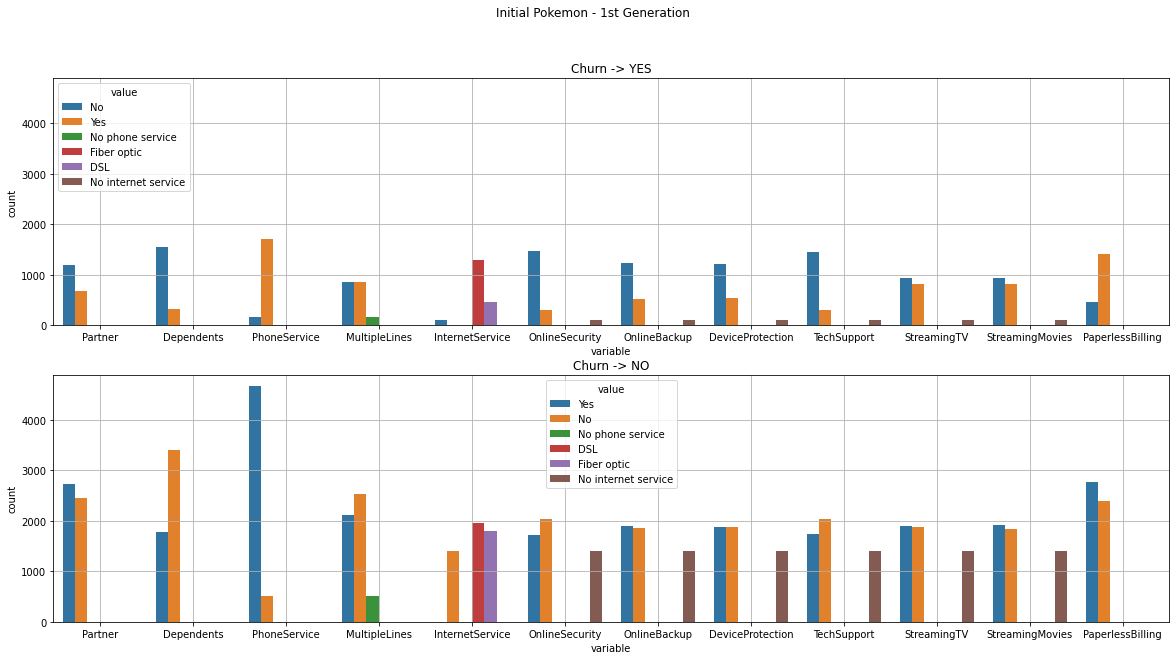

In [107]:
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

sns.countplot(ax=axes[0], x='variable', hue='value', data = pd.melt(Churn_yes))
axes[0].set_title('Churn -> YES')
axes[0].grid()

sns.countplot(ax=axes[1], x='variable', hue='value', data = pd.melt(Churn_no))
axes[1].set_title('Churn -> NO')
plt.grid()

plt.show()

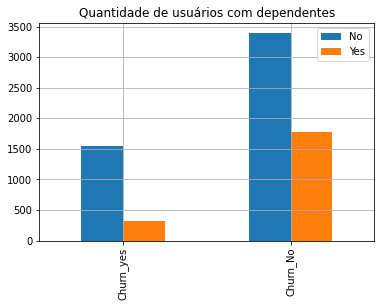

In [26]:
qtd_user_churn('Dependents', 'Quantidade de usuários com dependentes', dados_limpos)

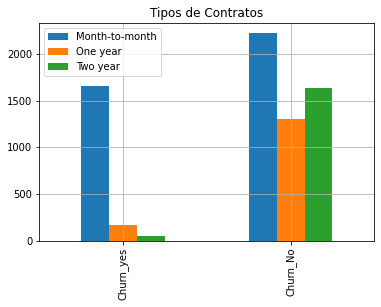

In [27]:
qtd_user_churn('Contract', 'Tipos de Contratos', dados_limpos)

##3.0 Categorização das colunas

Muitas features possuem categorização simples (ex.: Yes/No, Female/Male, etc.). Sendo assim, vamos criar uma função que busca por tais colunas e categoriza-las.

In [28]:
for columns in dados_limpos:
  print(f'Coluna {columns}: {dados_limpos[columns].unique()}')

Coluna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna Churn: ['No' 'Yes']
Coluna gender: ['Female' 'Male']
Coluna SeniorCitizen: [0 1]
Coluna Partner: ['Yes' 'No']
Coluna Dependents: ['Yes' 'No']
Coluna tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Coluna PhoneService: ['Yes' 'No']
Coluna MultipleLines: ['No' 'Yes' 'No phone service']
Coluna InternetService: ['DSL' 'Fiber optic' 'No']
Coluna OnlineSecurity: ['No' 'Yes' 'No internet service']
Coluna OnlineBackup: ['Yes' 'No' 'No internet service']
Coluna DeviceProtection: ['No' 'Yes' 'No internet service']
Coluna TechSupport: ['Yes' 'No' 'No internet service']
Coluna StreamingTV: ['Yes' 'No' 'No internet service']
Coluna StreamingMovies: ['No' 'Yes' 'No internet service']
Coluna Contract: ['One year' '

Camos categorizar itens simples utilizando função replace:

In [29]:
substituir = {'Female': 0,
              'Male': 1,
              'No': 0,
              'Yes': 1,
              'No phone service': 2,
              'No internet service': 3,
              'DSL': 4,
              'Fiber optic': 5,
              'One year': 6,
              'Month-to-month': 7,
              'Two year': 8,
              'Mailed check': 9,
              'Electronic check': 10,
              'Credit card (automatic)': 11,
              'Bank transfer (automatic)': 12,
              }
dados_categorizados = dados_limpos.replace(substituir)

In [30]:
for columns in dados_categorizados:
  print(f'Coluna {columns}: {dados_categorizados[columns].unique()}')

Coluna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna Churn: [0 1]
Coluna gender: [0 1]
Coluna SeniorCitizen: [0 1]
Coluna Partner: [1 0]
Coluna Dependents: [1 0]
Coluna tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Coluna PhoneService: [1 0]
Coluna MultipleLines: [0 1 2]
Coluna InternetService: [4 5 0]
Coluna OnlineSecurity: [0 1 3]
Coluna OnlineBackup: [1 0 3]
Coluna DeviceProtection: [0 1 3]
Coluna TechSupport: [1 0 3]
Coluna StreamingTV: [1 0 3]
Coluna StreamingMovies: [0 1 3]
Coluna Contract: [6 7 8]
Coluna PaperlessBilling: [1 0]
Coluna PaymentMethod: [ 9 10 11 12]
Coluna Charges.Daily: [2.18666667 1.99666667 2.46333333 ... 3.05833333 2.29333333 2.26166667]
Coluna Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Coluna Charges.Total: [

Vamos buscar quais dados se encontram não-categorizados ou não-numéricos. A expectativa é que apenas o 'customerID' esteja não-categorizada:

In [31]:
dados_categorizados.describe().columns
for columns in dados_categorizados:
  if columns not in dados_categorizados.describe().columns:
    print(columns)

customerID


Agora podemos adquirir informações do data frame com a função describe

In [32]:
dados_categorizados.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,3.575654,0.935011,...,0.992321,0.938567,1.032850,1.036832,7.030290,0.592719,10.426763,2.159940,64.798208,2283.300441
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,1.928525,1.165284,...,1.142250,1.163950,1.123912,1.122016,0.669398,0.491363,1.067504,1.002866,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,9.000000,0.608333,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,10.000000,1.186250,35.587500,401.450000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,10.000000,2.345000,70.350000,1397.475000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,11.000000,2.995417,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,5.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,8.000000,1.000000,12.000000,3.958333,118.750000,8684.800000


##4.0 Investigando dados correlacionados

Vamos investigar os dados recebidos e trabalhar em labels que possuam alta correlação entre si para removê-las. Primeiramente, vamos encontrar os dados possíveis de serem correlacionados puxando um informe do DataFrame.

In [33]:
dados_categorizados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   int64  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   int64  
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  Contract          7032 non-null   int64  


Os dados que podem ter correlação, são do tipo numéricos não-categóricos, os quais se resumem a apenas 3 colunas. Vamos seleciona-las e buscar por correlação.

In [34]:
dados_categorizados.select_dtypes(exclude='float64')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0002-ORFBO,0,0,0,1,1,9,1,0,4,0,1,0,1,1,0,6,1,9
1,0003-MKNFE,0,1,0,0,0,9,1,1,4,0,0,0,0,0,1,7,0,9
2,0004-TLHLJ,1,1,0,0,0,4,1,0,5,0,0,1,0,0,0,7,1,10
3,0011-IGKFF,1,1,1,1,0,13,1,0,5,0,1,1,0,1,1,7,1,10
4,0013-EXCHZ,1,0,1,1,0,3,1,0,5,0,0,0,1,1,0,7,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,4,1,0,0,1,0,0,6,0,9
7263,9992-RRAMN,1,1,0,1,0,22,1,1,5,0,0,0,0,0,1,7,1,10
7264,9992-UJOEL,0,1,0,0,0,2,1,0,4,0,1,0,0,0,0,7,1,9
7265,9993-LHIEB,0,1,0,1,1,67,1,0,4,1,0,1,1,0,1,8,0,9


Agora gerando matriz de correlação, temos:

In [35]:
# Matriz de correlação dos dados do tipo float, absolutos
matrix_corr = dados_categorizados[['Charges.Daily', 'Charges.Monthly', 'Charges.Total']].corr().abs()
matrix_corr

,Charges.Daily,Charges.Monthly,Charges.Total
Charges.Daily,1.000000,1.000000,0.651065
Charges.Monthly,1.000000,1.000000,0.651065
Charges.Total,0.651065,0.651065,1.000000


Analisando a matriz, vemos que seu triangulo superior é igual ao triangulo inferior com toda diagonal principal com valores unitários. O código abaixo remove a diagonal principal e triangulo inferior, além de indicar quais são as colunas que deverão ser removidas.

In [36]:
import numpy as np

alta_corr = 0.95
matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]
len(excluir)

1

In [37]:
excluir

['Charges.Monthly']

Conforme visto anteriormente, a coluna 'Charges.Monthly' está intríssecamente ligada a coluna 'Charges.Daily' pois esta última representa 'Charges.Monthly' dividida por uma constante. Sendo assim vamos remove-la para não enviezar nosso modelo futuro.

In [38]:
dados_categorizados = dados_categorizados.drop(['Charges.Daily'], axis=1)
dados_categorizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,4,...,1,0,1,1,0,6,1,9,65.6,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,4,...,0,0,0,0,1,7,0,9,59.9,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,5,...,0,1,0,0,0,7,1,10,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,5,...,1,1,0,1,1,7,1,10,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,5,...,0,0,1,1,0,7,1,9,83.9,267.40


##5.0 Separação dos dados de treino e teste

Uma vez que o conjunto de dados foi filtrado, precisamos separá-los em dados de treino (treinar o modelo) e dados de teste (testar o modelo)

Primeiramente iremos separar os dados tratados em um conjunto de entrada (x) e saída (y).

* A saída será basicamente uma matriz coluna contendo os resultados da Churn.
* A entrada serão todo o conjunto de dados coletados, com exceção dos dados de saída (Churn) e a coluna **customerID** a qual possui identificação de cada usuário. Sendo assim, será necessário retirar as colunas 'Churn' e 'customerID' dos dados.

In [39]:
x_columns = dados_categorizados.columns
y = dados_categorizados["Churn"]
x = dados_categorizados[x_columns].drop(["Churn","customerID"], axis=1)

Estes passos para separação de dados em entrada/saída são repetidos em demasia. Desse modo, será criada uma função para evitar retrabalho.

In [40]:
def separar_x_y(dados):
  x_columns = dados.columns
  y = dados["Churn"]
  x = dados[x_columns].drop(["Churn","customerID"], axis=1)
  return  x,y

Agora com os valores de entrada e saída devidamente criados, utilizamos métrica de separação de dados para seu treino e posterior teste. As principais métricas utilizadas são o:

* Train-Test-Split que separa os dados de maneira estratificada em aproximadamente 75% de seu conteúdo para treino e 25% para testes.



o Train-Test-Split para separação em dados de treino e teste. Esta biblioteca separa os dados em aproximadamente 75% de seu conteúdo para treino e 25% para testes.

##5.0 Balanceamento da variável target

Conforme mostrado na análise e vizualização dos dados, o conjunto enviado mostra um desbalanceamento em relação a nossa variável target (Churn).

In [41]:
churn_yes = dados_categorizados.query('Churn == 1')['Churn'].value_counts().tolist()[0]
churn_no = dados_categorizados.query('Churn == 0')['Churn'].value_counts().tolist()[0]

print(f'Quantidade de linhas\nChurn=Yes: {churn_yes} -> {100*churn_yes/(churn_yes+churn_no):.2f}% \nChurn=No: {churn_no} -> {100*churn_no/(churn_yes+churn_no):.2f}% ')

Quantidade de linhas
Churn=Yes: 1869 -> 26.58% 
Churn=No: 5163 -> 73.42% 


Podemos utilizar duas soluções para resolver este problema: Undersampling e Oversampling

* Oversampling tem a intensão de gerar dados sintéticos para o **treino** do modelo de modo a deixar as classes balanceadas
* Undersampling (explorar e aplicar)


###5.1 Oversampling

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline